In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
X = []
Y = []

for i in tqdm(glob('/kaggle/input/mydata/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('/kaggle/input/mydata/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)    




100%|██████████| 5000/5000 [00:22<00:00, 226.49it/s]


In [4]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [5]:
X = np.expand_dims(X,-1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
168/168 [==============================] - 50s 286ms/step - loss: 0.1290 - accuracy: 0.9522 - val_loss: 0.7974 - val_accuracy: 0.5119

Epoch 00001: val_loss improved from inf to 0.79741, saving model to bestModel.h5
Epoch 2/30
168/168 [==============================] - 47s 280ms/step - loss: 0.0624 - accuracy: 0.9772 - val_loss: 1.0234 - val_accuracy: 0.5119

Epoch 00002: val_loss did not improve from 0.79741
Epoch 3/30
168/168 [==============================] - 47s 282ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.6136 - val_accuracy: 0.6985

Epoch 00003: val_loss improved from 0.79741 to 0.61362, saving model to bestModel.h5
Epoch 4/30
168/168 [==============================] - 47s 278ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 5.7284 - val_accuracy: 0.5119

Epoch 00004: val_loss did not improve from 0.61362
Epoch 5/30
168/168 [==============================] - 47s 282ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.1037 - val_accuracy: 0.9627

Ep

In [11]:
model.evaluate(x_test, y_test)

104/104 [==============================] - 7s 70ms/step - loss: 0.4197 - accuracy: 0.9042


[0.41969817876815796, 0.9042423963546753]

In [16]:
from keras.models import load_model
best_model = load_model('/kaggle/working/bestModel.h5')
best_model.evaluate(x_test, y_test)

104/104 [==============================] - 8s 78ms/step - loss: 0.0040 - accuracy: 0.9991


[0.0040023899637162685, 0.9990909099578857]

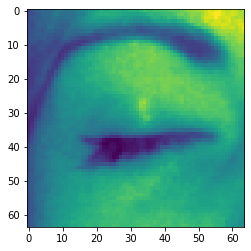

Closed


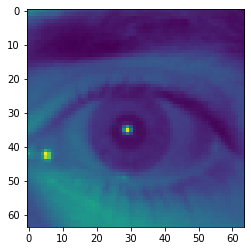

Open


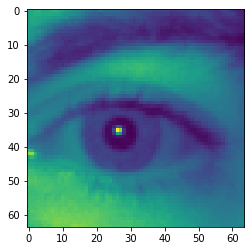

Open


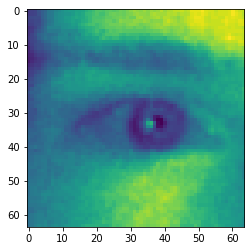

Open


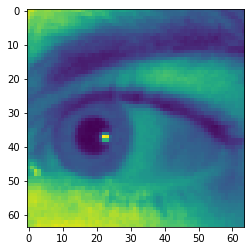

Open


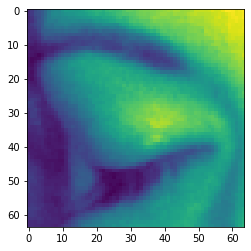

Closed


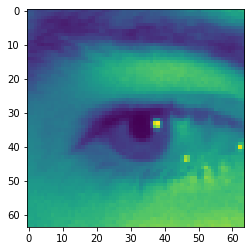

Open


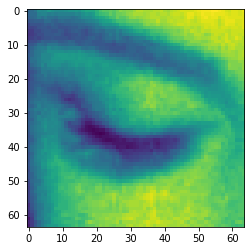

Closed


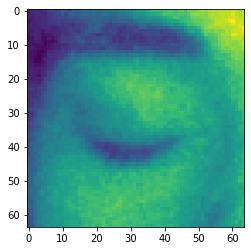

Closed


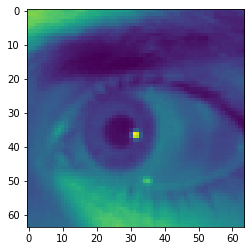

Open


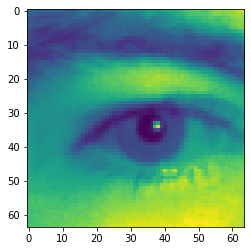

Open


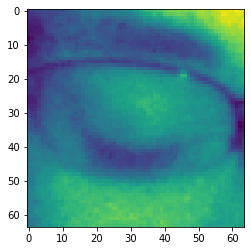

Closed


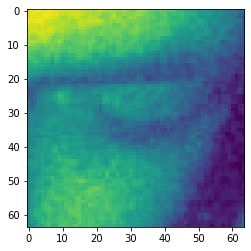

Closed


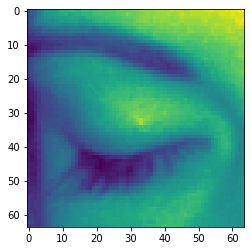

Closed


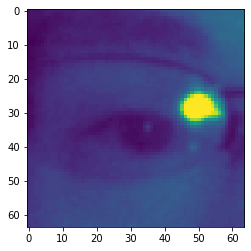

Open


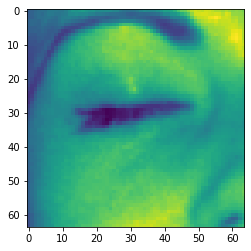

Closed


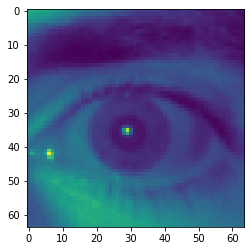

Open


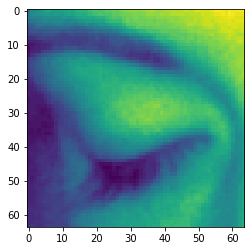

Closed


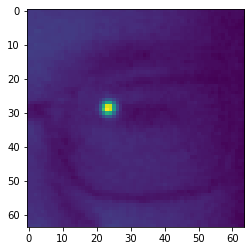

Closed


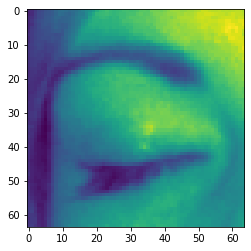

Closed


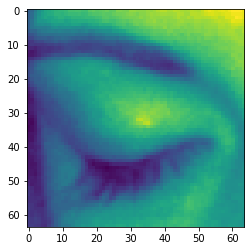

Closed


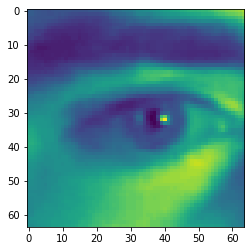

Open


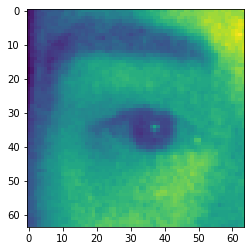

Open


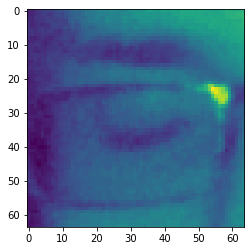

Closed


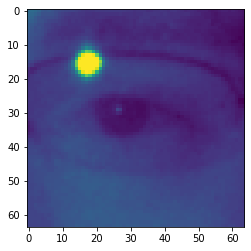

Open


In [18]:
for i in x_test[0:25]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")
    

Text(0.5, 24.0, 'Actual')

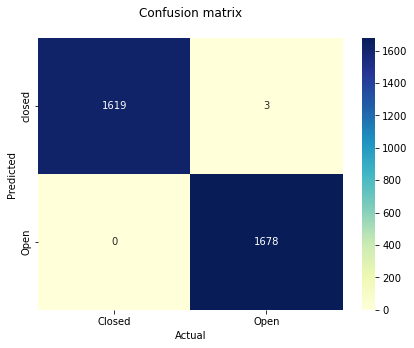

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")